# Description of the reference images used for Module 1.1

by _Benjamin Delory_,  _Guillaume Lobet_, and _Andrea Schnepf_

## Objective

This Jupyter Notebook contains a description of the reference images used for the data analysis pipeline for Module 1.1 (RSA calibration). 

In the context of our collaborative comparison framework, all root architecture models being compared are parameterized using a common set of metrics derived from 2D images of dicotyledonous (_Lupinus albus_) and monocotyledonous (_Zea mays_) root systems. Our root architecture benchmarking dataset contains two distinct sets of images:
- [Images of lupine roots grown for 11 days in an aeroponic setup](https://github.com/RSA-benchmarks/collaborative-comparison/tree/master/root_architecture/img/dicot/lupin) (Lobet et al, 2011)
- [Images of maize roots grown for 8 days on filter papers](https://github.com/RSA-benchmarks/collaborative-comparison/tree/master/root_architecture/img/monocot/maize) (Hund et al, 2009)

All images were analysed using the semi-automated root image analysis software [SmartRoot](https://smartroot.github.io/) (Lobet et al, 2011) and root tracings were saved as [RSML](https://rootsystemml.github.io/) (Lobet et al, 2015) files for further analysis.

## Requirements

To run the code, IRkernel must be installed.

The code provided in this Jupyter Notebook relies on the functions of the archiDART R package. More information about this package can be found in [Delory et al (2016)](https://link.springer.com/article/10.1007/s11104-015-2673-4) and [Delory et al (2018)](https://f1000research.com/articles/7-22/v1).

## Install the R packages needed for the analysis

This step is only necessary if the R packages are not available.

1. Open Anaconda Prompt
2. Type "R" and press "Enter"
3. Execute: `install.packages(c("ggplot2", "gtools", "vegan", "FactoMineR", "devtools", "TDA", "geometry", "sp", "gridExtra"))`
4. You can check that the packages have been correctly installed by executing `.packages(all.available=TRUE)`
5. Close R using `q()`

## Load R packages

In [1]:
# These packages are needed for this notebook. Additional packages can also be loaded as well.
library(ggplot2)
library(gtools)
library(gridExtra)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"Warning message:
"package 'gridExtra' was built under R version 3.6.1"

## Install and load archiDART

Although archiDART is available on [CRAN](https://cran.r-project.org/package=archiDART), the latest version (under development) is available on [GitHub](https://github.com/archidart/archidart). To install archiDART from GitHub (this is the recommended version for this notebook), use the following code:

In [2]:
#This command installs archiDART from its GitHub repository (remove the hashtag in front of "devtools" to install the package)
#devtools::install_github("archidart/archidart")
library(archiDART) #This command loads the archiDART package

## Install and load postarchiDART

postarchiDART is an R package containing functions developed for the post-processing of R objects created by archiDART functions. These functions were developed to solve species-specific issues associated with the reference root systems used for the benchmarking of RSA models. For instance, each lupin image contains 3 independent root systems. As one RSML file is associated with each image, each RSML contains information for the 3 root systems. Because images were analysed with SmartRoot, all root systems located in a single image are stored under the same "plant" tag, despite the fact that they belong to 3 different plants. It is therefore necessary to correct information such as plant and root identification number and root growth rates before going further in the analysis. For maize, each image contains a single plant, but some plants have more than one first-order root (i.e., roots that are directly connected to the shoot). This is due to the development of basal roots after a few days of growth. Considering that most RSA models require an independent set of input parameters for primary and basal roots, we developed functions able to split first-order root information into primary and basal root information.  

To install postarchiDART from [GitHub](https://github.com/archidart/archidart-utilities/tree/master/postarchidart), use the following code:

In [3]:
#This command installs post archiDART from its GitHub repository (remove the hashtag in front of "devtools" to install the package)
#devtools::install_github("archidart/archidart-utilities/postarchidart")
library(postarchiDART) #This command loads the postarchiDART package

## Import RSML for reference images

This can be done using the `rsmlToTable`function of archiDART.

`rsmlToTable`creates a data frame (rsmlToTable object). Each line of the data frame gives the attributes of 1 segment (e.g., length, orientation, spatial coordinates, etc.).

In [4]:
###########################
#Load RSML files for dicot
###########################

message("Load RSML files for lupin")
dicot<-rsmlToTable(inputrsml=file.path("M1.1 Reference data", "img", "dicot", "lupin"), 
                   unitlength="cm", rsml.connect=TRUE, rsml.date=NULL, unitangle="d", 
                   fitter=FALSE, show.progress=TRUE)

dicot<-correctPlantID(dicot) #Correct plant ID number

#############################
#Load RSML files for monocot
#############################

message("Load RSML files for maize")
monocot<-rsmlToTable(inputrsml=file.path("M1.1 Reference data", "img", "monocot", "maize"), 
                     unitlength="cm", rsml.connect=TRUE, rsml.date=NULL, unitangle="d", 
                     fitter=FALSE, show.progress=TRUE)

Load RSML files for lupin
Number of rsml files in inputrsml: 9


  |======================================================================| 100%

Load RSML files for maize
Number of rsml files in inputrsml: 24


  |======================================================================| 100%

## Plot reference root systems

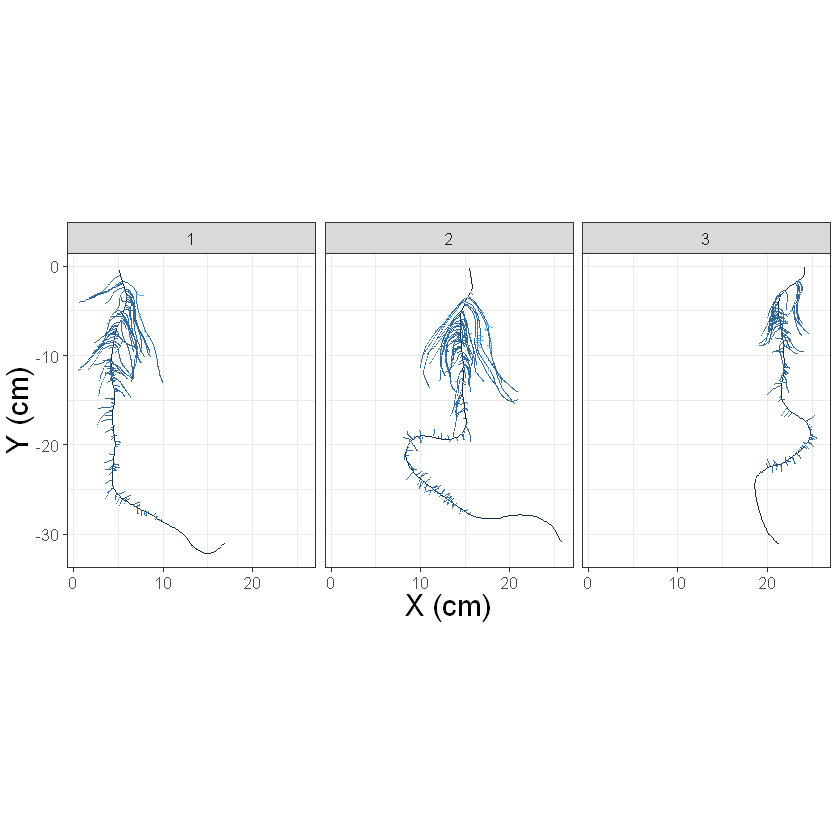

In [5]:
######################################
#Plot reference root systems for dicot
######################################

ggplot(dicot[dicot$file=="lupin_d11",])+
geom_segment(aes(x=x1, y=-y1, xend=x2, yend=-y2, col=order), size=0.5, alpha=1)+
coord_fixed()+
theme_bw()+
facet_wrap(~plant, ncol=3)+
xlab("X (cm)")+
ylab("Y (cm)")+
theme(axis.title=element_text(size=18), text=element_text(size=12), legend.position="none")

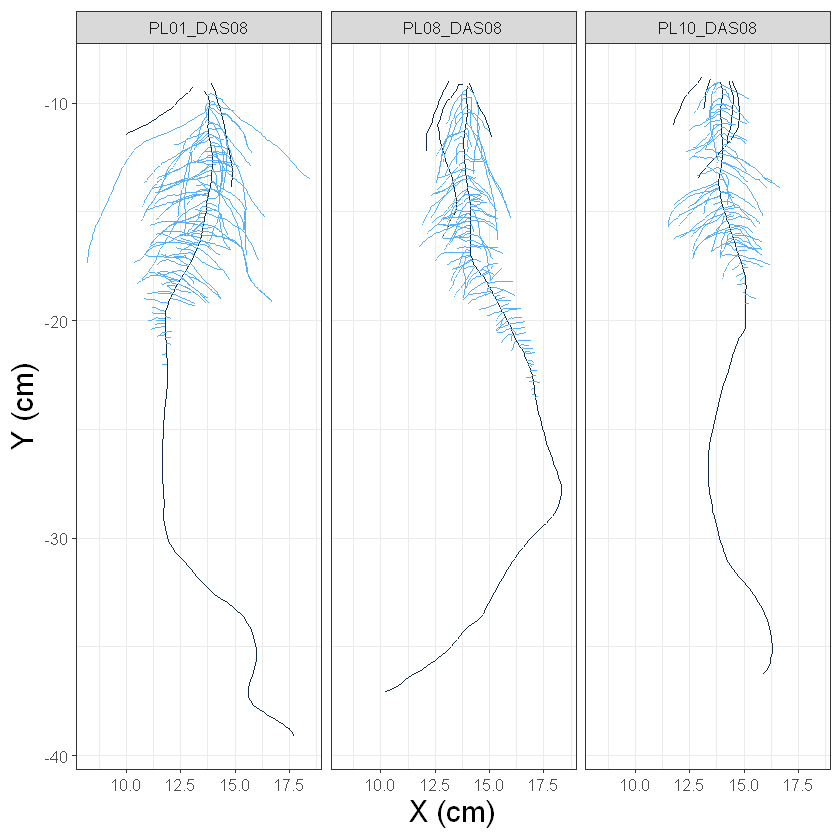

In [6]:
#########################################
#Plot reference root systems for monocot
#########################################

ggplot(monocot[monocot$file=="PL01_DAS08"|monocot$file=="PL08_DAS08"|monocot$file=="PL10_DAS08",])+
geom_segment(aes(x=x1, y=-y1, xend=x2, yend=-y2, col=order), size=0.5, alpha=1)+
coord_fixed()+
theme_bw()+
facet_wrap(~file, ncol=3)+
xlab("X (cm)")+
ylab("Y (cm)")+
theme(axis.title=element_text(size=18), text=element_text(size=12), legend.position="none")

## Plot vertical root distribution for reference root systems

In [7]:
#Select root systems at last observation date (11 days for lupin, 8 days for maize)
root.ref<-smartbind(dicot[dicot$file=="lupin_d11",], monocot[monocot$file=="PL01_DAS08"|monocot$file=="PL08_DAS08"|
                                                             monocot$file=="PL10_DAS08",])
root.ref$species<-c(rep("lupin", sum(root.ref$file=="lupin_d11")), rep("maize", nrow(root.ref)-sum(root.ref$file=="lupin_d11")))
root.ref$plant[root.ref$file=="PL01_DAS08"]<-1
root.ref$plant[root.ref$file=="PL08_DAS08"]<-2
root.ref$plant[root.ref$file=="PL10_DAS08"]<-3

#Calculate cumulative root length proportion

rld<-data.frame()

for (sp in unique(root.ref$species)){
    
    for (pl in 1:3){
        
        sub<-root.ref[root.ref$species==sp & root.ref$plant==pl,]
        sub<-sub[order(sub$y2),]
        sub$y2<-sub$y2-min(sub$y2)
        sub$cumulprop<-cumsum(sub$length)/sum(sub$length)
        rld<-rbind(rld, sub[,c("species", "plant", "y1", "y2", "cumulprop")])}}

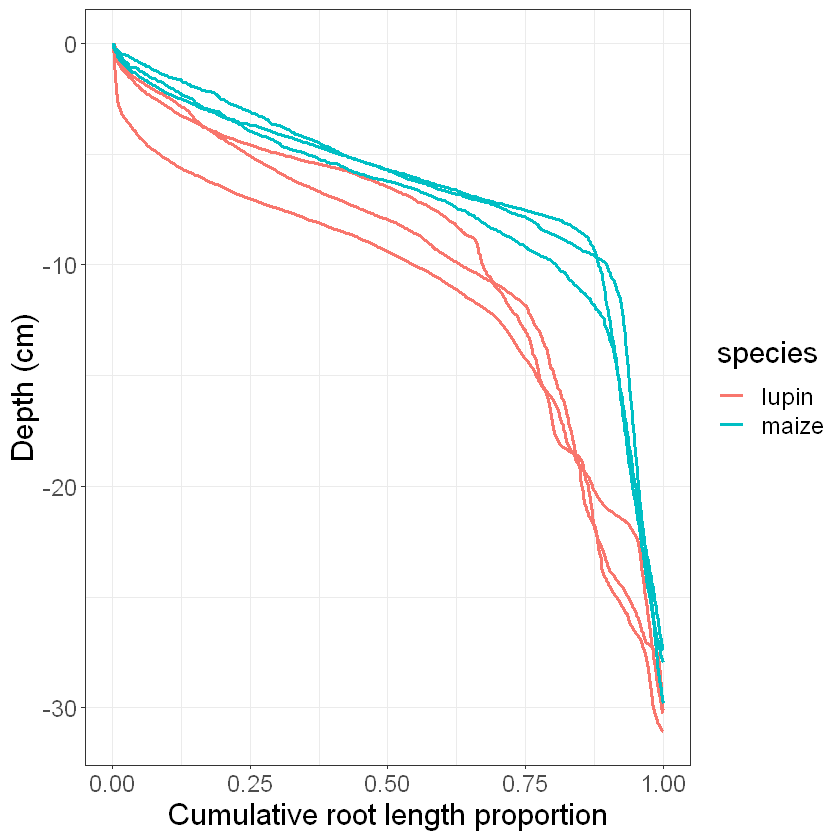

In [8]:
###########################################################
#Plot vertical root distribution for reference root systems
###########################################################

ggplot(rld) +
geom_line(aes(x = -y2, y = cumulprop, colour=species, group=paste(species, plant, sep="-")), size=1)+ 
coord_flip() +
xlab("Depth (cm)") +
ylab("Cumulative root length proportion")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18))

## Compute traits for reference root systems

In archiDART, the `architect` function can be used to compute root system traits. For each root system and each observation date, the following parameters will be calculated:

- **TRL**: total root length
- **GRTR**: growth rate of the root system
- **L1R**: first-order root length
- **GR1R**: first-order root growth rate
- **TN1R**: total number of first-order roots
- **TNLR**: total number of lateral roots
- **TLRL**: total lateral root length
- **NxLR**: total number of lateral roots with a branching order equal to x
- **LxLR**: total length of lateral roots with a branching order equal to x
- **MLxLR**: mean length of lateral roots with a branching order equal to x
- **GRxL**: growth rate of roots with a branching order equal to x
- **D2LR**: density of secondary roots on first-order roots
- **Height**: root system height
- **Width**: root system width
- **ConvexhullXY**: area of the convex hull on the XY plane
- **ConvexhullXZ**: area of the convex hull on the XZ plane
- **ConvexhullYZ**: area of the convex hull on the YZ plane
- **Convexhull3D**: volume of the convex hull (for 3D root systems)
- **Magnitude**: the magnitude of the root system (Fitter, 1986, 1987)
- **Altitude**: the altitude of the root system (Fitter, 1986, 1987)
- **ExtPathLength**: the total exterior path length of the root system (Fitter, 1986, 1987)

If diameter values are provided in the RSML files, the following parameters will be calculated for each root system at the last observation date:

- **MDx**: mean diameter of roots with a branching order equal to x
- **MDLR**: mean lateral root diameter
- **Sx**: total surface area of roots with a branching order equal to x
- **Stot**: total root surface area
- **Vx**: total volume of roots with a branching order equal to x
- **Vtot**: the root system volume

The rsmlToTable objects created earlier can directly be used as an input of the `architect` function. Root system traits can be calculated using the following code:

In [9]:
######################################################
#Compute root system traits for reference root systems
######################################################

#For the dicot
plant.dicot<-architect(inputrsml=dicot, fitter=TRUE)
plant.dicot$Time<-as.numeric(sapply(strsplit(sapply(strsplit(plant.dicot$FileName, split="_"), "[[", 2), split="d"), "[[", 2))
plant.dicot<-plant.dicot[order(plant.dicot$Time, plant.dicot$FileName),]
plant.dicot<-correctGrowthRateDicot(plant.dicot)
plant.dicot$model<-"reference"
plant.dicot$species<-"lupin"
plant.dicot$FileName<-paste("lupin_", sapply(strsplit(plant.dicot$FileName, split="_"), "[[", 3))

#For the monocot
plant.monocot<-architect(inputrsml=monocot, fitter=TRUE)
plant.monocot<-correctFirstOrderRoots(x=monocot, y=plant.monocot)
plant.monocot$Time<-rep(1:8, 3)
plant.monocot<-plant.monocot[order(plant.monocot$Time, plant.monocot$FileName),]
plant.monocot<-correctGrowthRateMonocot(plant.monocot)
plant.monocot$model<-"reference"
plant.monocot$species<-"maize"
plant.monocot$FileName<-sapply(strsplit(plant.monocot$FileName, split="_"), "[[", 1)

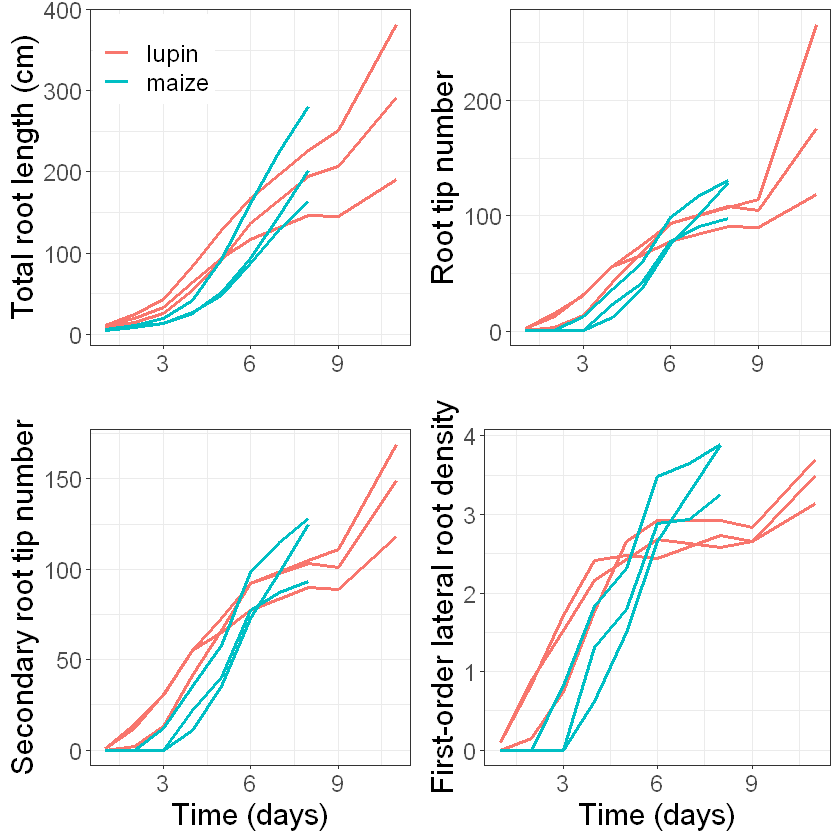

In [10]:
###########################################################
#Plot a selection of RSA traits for reference root systems
###########################################################

plant.ref<-smartbind(plant.dicot, plant.monocot)

p1<-ggplot(plant.ref)+
geom_line(aes(x=Time, y=TRL, colour=species, group=FileName), size=1)+
xlab("")+
ylab("Total root length (cm)")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18), legend.position=c(0.2,0.85), legend.title = element_blank())

p2<-ggplot(plant.ref)+
geom_line(aes(x=Time, y=TNLR+TN1R, colour=species, group=FileName), size=1)+
xlab("")+
ylab("Root tip number")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18), legend.position="none")

p3<-ggplot(plant.ref)+
geom_line(aes(x=Time, y=N2LR, colour=species, group=FileName), size=1)+
xlab("Time (days)")+
ylab("Secondary root tip number")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18), legend.position="none")

p4<-ggplot(plant.ref)+
geom_line(aes(x=Time, y=D2LR, colour=species, group=FileName), size=1)+
xlab("Time (days)")+
ylab("First-order lateral root density")+
theme_bw()+
theme(axis.title=element_text(size=18), text=element_text(size=18), legend.position="none")

grid.arrange(p1, p2, p3, p4, nrow=2)

## References

Delory, B. M., Baudson, C., Brostaux, Y., Lobet, G., du Jardin, P., Pagès, L., and Delaplace,P. (2016). [archiDART: an R package for the automated computation of plant root architectural traits](https://link.springer.com/article/10.1007/s11104-015-2673-4). _Plant and Soil_, 398(1):351–365.

Delory, B. B. M., Li, M., Topp, C. C. N., and Lobet, G. (2018). [archiDART v3.0: A new data analysis pipeline allowing the topological analysis of plant root systems](https://f1000research.com/articles/7-22/v1). _F1000Research_, 7:22.

Fitter, A.H. (1986). [The topology and geometry of plant root systems: influence of watering rate on root system topology in _Trifolium pratense_](https://academic.oup.com/aob/article/58/1/91/174778). _Annals of Botany_, 58(1):91–101.

Fitter, A.H. (1987). [An architectural approach to the comparative ecology of plant root systems](https://nph.onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-8137.1987.tb04683.x). _New Phytologist_, 106(s1):61–77.

Hund, A., Trachsel, S., and Stamp, P. (2009). [Growth of axile and lateral roots of maize: Idevelopment of a phenotying platform](https://link.springer.com/article/10.1007/s11104-009-9984-2). _Plant and Soil_, 325(1):335–349.

Lobet, G., Pagès, L., and Draye, X. (2011). [A novel image-analysis toolbox enabling quantitative analysis of root system architecture](http://www.plantphysiol.org/content/157/1/29). _Plant Physiology_, 157:29–39.

Lobet, G., Pound, M. P., Diener, J., Pradal, C., Draye, X., Godin, C., Javaux, M., Leitner, D.,Meunier, F., Nacry, P., Pridmore, T. P., and Schnepf, A. (2015). [Root System Markup Language: toward an unified root architecture description language](http://www.plantphysiol.org/content/167/3/617). _Plant Physiology_, 167:617–627.